In [45]:
import eli5
import joblib
import pickle
import os
import numpy as np
import random
import pandas as pd
import matplotlib as plt
import seaborn as sns
from _functions import TextCleaner
%matplotlib inline

In [2]:
os.chdir("../..")

In [3]:
clf = joblib.load('_dt/classifier.pkl')
vectorizer = pickle.load(open('_dt/vectorizer.pkl', mode='rb'))

In [6]:
eli5.show_weights(clf, feature_names = vectorizer.get_feature_names())

Weight?,Feature
+7.020,fluchtling
+2.942,eu
+2.730,migrant
+2.591,deutschland
+2.571,mensch
+1.936,zahl
+1.870,land
+1.817,asylbewerb
+1.799,abschieb
+1.772,kirchenasyl


In [14]:
# load example data
datadir = os.path.expanduser('_dt/_handcoding/')
dta = pd.read_csv(datadir+'handcoding_finished.csv', header=0)
dta['labels'] = dta.mig == 'Ja'
dta = dta[dta.labels]

In [47]:
dta['tokens'], dta['stems'] = TextCleaner(dta.text)

In [52]:
example = [i for i in dta['stems']][random.randint(0, dta.shape[0])]
eli5.show_prediction(clf, example, vec = vectorizer, feature_names = vectorizer.get_feature_names())
# NOTE: this doesnt work properly bc of stemming

In [10]:
def FeaturePlot(clf, vectorizer):

    feature_names = vectorizer.get_feature_names()
    
    top30_index = np.argsort(clf.coef_[0])[-30:]
        
    top30_coefs = pd.Series([clf.coef_[0][j] for j in top30_index])
    top30_features = pd.Series([feature_names[j] for j in top30_index])
    top30 = pd.concat([top30_coefs, top30_features], axis = 1)
    
    # plot
    sns.set(rc={'figure.figsize':(10,10)})
    plot = sns.barplot(data=top30, x=0, y=1, alpha=.8)
    plot.set(xlim=(0,None))

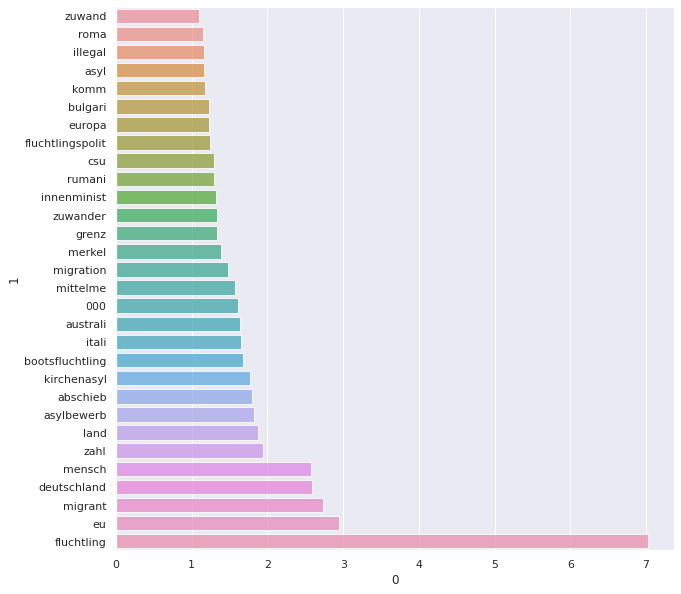

In [11]:
FeaturePlot(clf, vectorizer)

In [12]:
def CountPlot(clf, vectorizer):

    feature_names = vectorizer.get_feature_names()
    top30_index = np.argsort(clf.coef_[0])[-30:]
    top30_features = pd.Series([feature_names[j] for j in top30_index])
    
    feature_mtrx = pd.DataFrame(clf.feature_count_)[top30_index].transpose()
    feature_mtrx = feature_mtrx.set_index(top30_features)
    
    # plot
    sns.set(rc={'figure.figsize':(20,10)})
    plot = sns.heatmap(data=feature_mtrx, annot = True, fmt = "0")
#     plot.set(xlim=(0,None))

In [13]:
CountPlot(clf, vectorizer)

AttributeError: 'LogisticRegression' object has no attribute 'feature_count_'